In [1]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 61.3 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1064923 sha256=bb9d0202f2e5536c534c9cdc2aa8d80b30a119f952d310368d2ad1c281acfb1b
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface


In [2]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.0 MB/s eta 0:00:00


## Importing Libraries

In [3]:
from matplotlib import pyplot as plt
import cv2
import insightface

## Configure params

In [4]:
providers = ["CPUExecutionProvider"]

## Reading Source Face and Target Frame

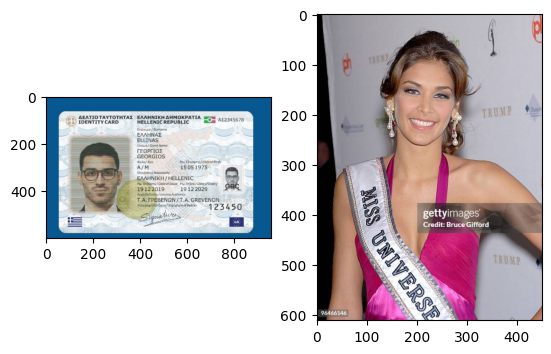

In [6]:
target_frame = cv2.imread('/content/miss_uni.jpg')
src_frame = cv2.imread("/content/ID_front-960x600-1.jpg")
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(src_frame, cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(target_frame, cv2.COLOR_BGR2RGB))
plt.show()

## Identify faces

In [7]:
FACE_ANALYSER = insightface.app.FaceAnalysis(
                    name="buffalo_l",
                    root=".", providers=providers,allowed_modules=["landmark_3d_68", "landmark_2d_106","detection","recognition"]
                )
FACE_ANALYSER.prepare(
                ctx_id=0,
                det_size=(640, 640),
            )

download_path: ./models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 72958.45KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [12]:
!pip install --upgrade protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 6.30.1 which is incompatible.
google-cloud-dataproc 5.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1 which is incompatible.
google-cloud-bigquery-connection 1.18.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1 which is incompatible.
google-cloud-translate 3.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=

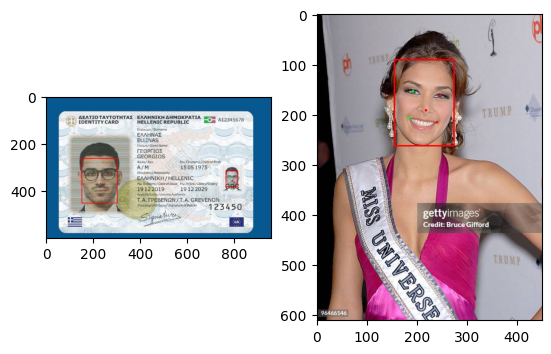

In [9]:
import numpy as np
np.int = int

src_faces = FACE_ANALYSER.get(src_frame)
target_faces = FACE_ANALYSER.get(target_frame)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
rimg = FACE_ANALYSER.draw_on(src_frame,src_faces)
ax1.imshow(cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB))
ax1 = fig.add_subplot(1,2,2)
rimg = FACE_ANALYSER.draw_on(target_frame,target_faces)
ax1.imshow(cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB))
plt.show()

## Face Swapper

In [13]:
model_path = './models/inswapper_128.onnx'
model_swap_insightface = insightface.model_zoo.get_model(model_path, providers=providers)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [14]:
img_fake = model_swap_insightface.get(img = target_frame, target_face=FACE_ANALYSER.get(target_frame)[0], source_face=src_faces[0], paste_back=True)

In [ ]:
plt.imshow(cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite('ironman_is_back.jpg',img_fake)

True